# Sistemas de Ecuaciones Diferenciales para Convivencia de Especies

Autor: José Carlos Machicao

Depredadores y presas es un esquema que puede repetirse desde los sistemas naturales en un ambiente totalmente libre de presencia humana hasta la oficina de cualquiera de nosotros. 

In [192]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

Los coeficientes de las ecuaciones, por lo general tienen los siguientes significados:
* El término de la variable propia la de especie está vinculado generalmente a la tasa de crecimiento poblacional neto o los factores que afectan la tasa de nacimiento. El coeficiente general estabilizador está alrededor de 1/100
* El término de la variable propia multiplicada por una variable de otra especie, alude al encuentro entre las dos especies. El coeficiente general estabilizador está alrededor de 1/1000
* El término de la variable cuadrática propia alude a cosas que esta especie genera por su propia acción, por ejemplo carencia de comida, proporcional a su propia población. El coeficiente general estabilizador está alrededor de 1/1e4

In [197]:
##### FUNCION #####
# Esta función crea un modelo parecido al Loopy en un sistema de ecuaciones diferenciales
def modelo(x, t, k):
    a, b, c = x
    dadt = + 0.01*k[0]*a + 0.001*k[1]*a*b + 0.0001*k[2]*a**2 - 0.0001*k[9]*a*c
    dbdt = + 0.01*k[3]*b + 0.001*k[4]*a*b + 0.0001*k[5]*b**2
    dcdt = + 0.01*k[6]*c + 0.001*k[7]*c*a + 0.0001*k[8]*b**2
    return([dadt, dbdt, dcdt])

In [198]:
# Definición de parámetros de tiempo
ini_tiempo, fin_tiempo, pasos_tiempo = [0, 1000, 1000]
t = np.linspace(ini_tiempo, fin_tiempo, pasos_tiempo) # pasos de tiempo

Para el depredador:<br>
* K[0]: Cuán fuerte es su balance poblacional<br>
* K[1]: Cuánto le beneficia el encuentro con la presa<br>
* K[2]: Cuánto le afecta o beneficia su tamaño poblacional<br>

Para la presa:<br>
* K[3]: Cuán fuerte es su balance poblacional<br>
* K[4]: Cuánto le afecta el encuentro con el depredador<br>
* K[5]: Cuánto le afecta o beneficia su tamaño poblacional<br>

Para el defensor:<br>
* K[3]: Cuán fuerte es su inserción en el sistema<br>
* K[4]: Cuánto le afecta el encuentro con el depredador<br>
* K[5]: Cuánto le afecta o beneficia su tamaño poblacional<br>

In [214]:
# Definición de valores iniciales
x_0 = [1.0, 10.0, 1.0] # initial condition

# Definición de constantes en las ecuaciones
k = [-2.0, +1.0, -2.0, # primera ecuación ****** depredador
     +3.0, -3.0, +1.0, # segunda ecuación ****** presa
     +1.5, -1.0, +0.0, -4.0]

Cuando se quiere establecer un punto de inicio, es recomendable partir de 2 para todos los coeficientes

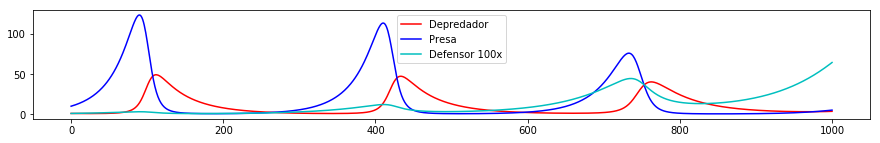

In [216]:
# solución de ecuaciones diferenciales
x = odeint(modelo, x_0, t, args=(k,))

aa = x[:,0]
bb = x[:,1]
cc = x[:,2]

plt.figure(figsize=(15,2))
plt.plot(t, aa, 'r-', label='Depredador')
plt.plot(t, bb, 'b-', label='Presa')
plt.plot(t, cc, 'c-', label='Defensor 100x')
plt.legend(loc='best')
plt.show()

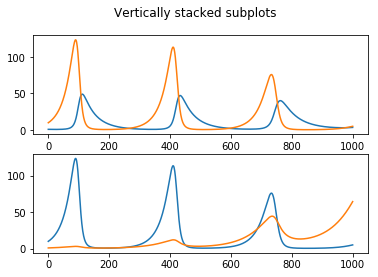

In [218]:
fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(t, aa)
axs[0].plot(t, bb)
axs[1].plot(t, bb)
axs[1].plot(t, cc)